# Reminders:

So far we have described **Principal Component Analysis**: <br><br>
 1. Method to find **new projections** of original data, <br><br>
 2. **Unsupervised method**, so we are not looking at a map between inputs and outputs, <br><br>
 2. New projections are **new dimensions** that explain most of the variability of the data, <br><br>
 3. Main idea is that **reduced number** of new dimensions will fully characterize the real trends of data, <br><br>
 4. Reduced kept dimensions are the **Principal Components** we decide to keep, <br><br>
 5. Left out Principal Components explain very little of the variance of data (probably just noise), <br><br>
 6. **Limitations:** <br>
    - New projections are **linear combinations** of original dimensions, <br>
    - New projections are **orthogonal** to each other (reduces some of the degrees of freedom with respect to transformations of the data) <br><br>
 7. **Applications:**<br>
    - Visualization in reduced spaces, <br>
    - Dimensionality reduction, <br>
    - Clustering, <br>
    - Noise elimination, outliers detection, <br>
    - Identification of redundant or very correlated inputs, <br><br>
    
    
**Today** we will cover: <br><br>
 1. **Outliers detection**, <br><br>
 2. **Techniques to handle outliers**, <br><br>
 3. **Techniques to handle missing data**, <br><br>
    

## Outliers

### What is an outlier?
1. **Definition**: Observations that are far from the main population of observations, <br> or else, observations that do not belong in the same distribution of the majority of observations. <br><br>
2. An sample can be an outlier *with respect to*:<br>
   a. The input space: measurement really far away from the region where most samples were taken, <br>
   b. The output space: output/response is very different from most sample responses, <br>
   c. Both input and output space <br><br>
   
**Are all outliers bad data points???**
1. If the significant deviation is only in the output measurement: 
   - Likely that it is due to a failure in measurement device or mistake. <br><br>
   - To be able to be certain of the above: **ENOUGH DATA TO JUSTIFY IT** <br><br>
   - **Examples:** Let's look a 1D example. We have a data set X-y, where we suspect there is a relationship: y=f(X)

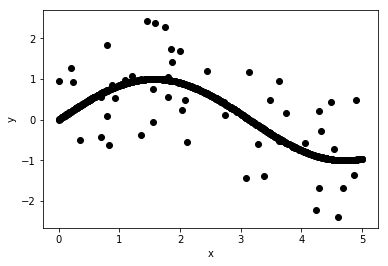

In [4]:
##DATA SET 1: 

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
rng = np.random.RandomState(0)
X = 5 * rng.rand(1000, 1).ravel()
y = np.sin(X)
y[::20] += 3 * (0.5 - rng.rand(X.shape[0] // 20))
# #############################################################################

# #############################################################################
# Look at the results by plotting just y:
plt.figure()
plt.scatter(X, y, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# #############################################################################


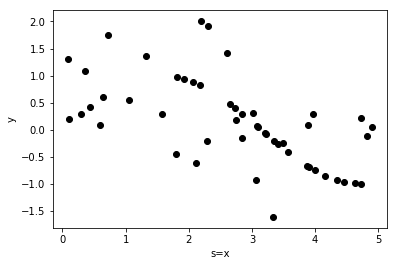

In [5]:
##DATA SET 2: 

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
rng = np.random.RandomState(0)
X = 5 * rng.rand(50, 1)
y = np.sin(X).ravel()
y[::2] += 3 * (0.5 - rng.rand(X.shape[0] // 2))
# #############################################################################

# #############################################################################
# Look at the results by plotting just y:
plt.figure()
plt.scatter(X, y, c='k' )
plt.xlabel('s=x')
plt.ylabel('y')
plt.show()
# #############################################################################

**DISCUSSION:**
1. In the above two examples, how would you identify the outliers??? <br><br>
2. What are the main differences between Example 1 and Example 2? <br><br>
3. What would you do to find whether a measurement is an outlier? <br><br>


2.479607671858914 1.4529942078030507
0.1629213857401275 0.7454446257394572
[] []
[2.36789093 2.43156928 1.72905773 1.69915605 1.83009117 2.2779755 ] [-1.38353569 -1.67126319 -1.34890289 -1.44000188 -2.22237826 -1.68227163
 -2.40223589]


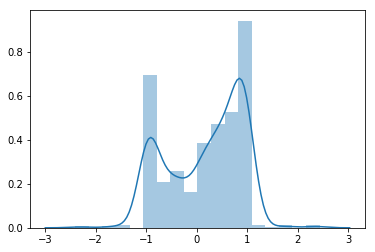

In [11]:
#For example 1:
# Generate sample data
import seaborn as sns
rng = np.random.RandomState(0)
X = 5 * rng.rand(1000, 1).ravel()
y = np.sin(X)
y[::20] += 3 * (0.5 - rng.rand(X.shape[0] // 20))
meanx = np.average(X)
stdevx = np.std(X)
meany = np.average(y)
stdevy = np.std(y)

# Print average and standard deviation of data:
print(meanx,stdevx)
print(meany,stdevy)

# Does my data follow normal distribution?
#sns.distplot(X, hist=True)
sns.distplot(y,hist=True)

# How many points lie outside +/- 2sd of data?
Bp = X[np.where(X>=(meanx+2*stdevx))[0]]
Bn = X[np.where(X<=(meanx-2*stdevx))[0]]
print(Bp,Bn)

Ap = y[np.where(y>=(meany+2*stdevy))[0]]
An = y[np.where(y<=(meany-2*stdevy))[0]]
print(Ap,An)

2.689825591377706 1.3613291146088793
0.14047926804142377 0.8012347856407276
[] []
[2.00940261 1.90963112] [-1.62134228]


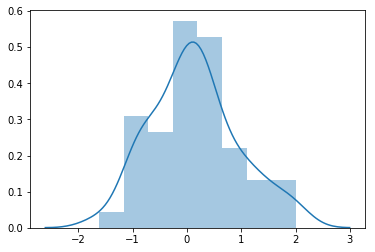

In [15]:
#For example 2:
# Generate sample data
import seaborn as sns
rng = np.random.RandomState(0)
X = 5 * rng.rand(50, 1).ravel()
y = np.sin(X)
y[::2] += 3 * (0.5 - rng.rand(X.shape[0] // 2))
meanx = np.average(X)
stdevx = np.std(X)
meany = np.average(y)
stdevy = np.std(y)

print(meanx,stdevx)
print(meany,stdevy)

# Does my data follow normal distribution?
#sns.distplot(X, hist=True)
sns.distplot(y,hist=True)

# How many points lie outside +/- 2sd of data?
Bp = X[np.where(X>=(meanx+2*stdevx))[0]]
Bn = X[np.where(X<=(meanx-2*stdevx))[0]]
print(Bp,Bn)

Ap = y[np.where(y>=(meany+2*stdevy))[0]]
An = y[np.where(y<=(meany-2*stdevy))[0]]
print(Ap,An)

2. If the deviation is both in the input/output space: 
   - Maybe it is not a wrong measurement, but an anomally in the performance of a system. <br><br>
   - What we decide to do with this, depends on the application: <br> <br>
   - **Example:** Given the following data, asked to fit a model between X-y, what would you do?<br><br>

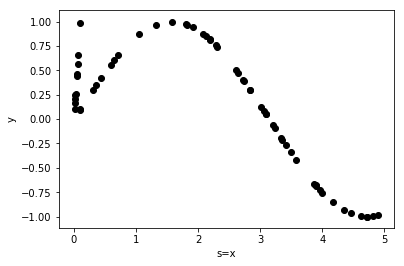

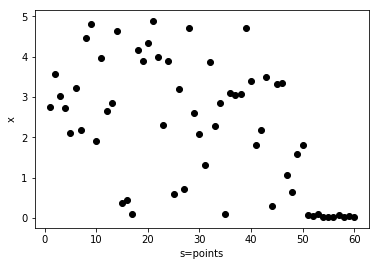

In [16]:
##GENERATION OF DATA:
rng = np.random.RandomState(0)
X1 = 5 * rng.rand(50, 1).ravel()
X2 = 0.1 * rng.rand(10,1).ravel()
y1 = np.sin(X1)
y2 = 10*np.sin(X2)
X  = [*X1, *X2]
y  = [*y1, *y2]
##

#Look at the results by plotting just y:
plt.figure()
plt.scatter(X, y, c='k' )
plt.xlabel('s=x')
plt.ylabel('y')
plt.show()

#Look at the results by plotting just x:
plt.figure()
plt.scatter(np.linspace(1,60,60), X, c='k' )
plt.xlabel('s=points')
plt.ylabel('x')
plt.show()

### How to detect outliers?

#### By inspection:
- Still commonly used technique in many practical applications. <br>
- Plot output data, remove ones that are clearly far away from most. <br>
- Can be dangerous if not considered input distribution of data. <br> <br>

#### By statistical tests:
- Use Mahalanobolis distance: is a measure of distance between distributions. <br> <br>
- In example below (same example discussed last lecture), the M. distance is plotted for the input data. Any point that falls outside the dotted curve would be an outlier. Here, there are no outliers. <br><br>
- Statistical software and python tools can be used to calculate this distance and produce such plots. <br><br>

<img src="principal_components_loan_applicant_outlier_plot.png" width="500" />

- Use more modern Machine Learning tools, that account for nonlinearity in data: http://scikit-learn.org/stable/modules/outlier_detection.html <br><br>

<img src="sphx_glr_plot_anomaly_comparison_001.png" width="500" />

- If problem is high-dimensional, use PCA -> project to lower dimensions -> then detect from outliers (similar to how we detected clusters!) <br> <br>
- **ALWAYS REMEMBER:** Outliers in high-dimensional data can be very well hidden. Use statistical tests to detect them. 


### How to handle outliers?
**Depending on type of outlier:** <br>
1. **Remove entire measurement.** <br>
  - Most relevant if we have the type of outliers shown in the last example above. <br><br>
  - Entire measurement should not be used for the same prediction of majority of models. <br><br>
2. **Remove output prediction and treat it as a missing value.** <br><br>
  - Most relevant if we have the type of outliers of the first two problems (only in output) <br><br>
  - BE VERY CAREFUL when doing this!!!**ASK YOURSELF** <br><br>
    1. Do I have enough data to remove outliers?<br>
    2. Are they really outliers or trends in my data? <br>
    3. Always REPORT the removal of outliers when reporting results (scientific reports, progress reports, publications!) <br>
     

## Missing Data

### How to handle missing data?

<img src="Lecture23.png" width="500" />

**There two main different approaches:** <br>
1. Completely **disregard** any rows (samples) with missing elements. <br><br>
   - This can be done if we have enough data remaining when removing all incomplete rows. <br>
   - Even if we remain with enough data, we might actually lose important information by removing rows which still had measurements. <br>
  
2. **Imputing** missing elements <br><br>
   - **Main idea:** even if some measurements are missing from a sample, we can infer what those are, based on the values of the sample that are available. <br>
   - Conceptually, we can expect that "similar" measurements, will have similar input values. <br>
   - Essentially, we are assuming some correlation, and predicting what an input measurement should have been, based on complete observations. <br>
   - Many techniques exist, from simple (i.e., replacing all missing values by a mean of the data), to very complex (i.e., assuming some nonlinear relationship and interpolating values. <br>
   - Key thing to remember: MANY examples exist that show that, a regression function is more predictive when using imputation techniques and fitting data, rather than a technique where we completely removed all incomplete rows. <br>
   
**WHAT YOU DECIDE TO DO DEPENDS ON:** <br><br>
- The amount of data <br>
- The amount of missing data <br>
- The complexity of the data set <br>
- The structure of the missing data patterns<br>

**EXAMPLE:** (taken from http://scikit-learn.org/stable/auto_examples/plot_missing_values.html#sphx-glr-auto-examples-plot-missing-values-py)

In [3]:
import numpy as np

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

rng = np.random.RandomState(0)

dataset = load_boston()
X_full, y_full = dataset.data, dataset.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

# Estimate the score on the entire dataset, with no missing values
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_full, y_full).mean()
print("Score with the entire dataset = %.2f" % score)

# Add missing values in 75% of the lines
#missing_rate = 0.75
#n_missing_samples = np.floor(n_samples * missing_rate)
#missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
#                                      dtype=np.bool),
#                             np.ones(n_missing_samples,
#                                     dtype=np.bool)))
#rng.shuffle(missing_samples)
#missing_features = rng.randint(0, n_features, n_missing_samples)

# Estimate the score without the lines containing missing values
#X_filtered = X_full[~missing_samples, :]
#y_filtered = y_full[~missing_samples]
#estimator = RandomForestRegressor(random_state=0, n_estimators=100)
#score = cross_val_score(estimator, X_filtered, y_filtered).mean()
#print("Score without the samples containing missing values = %.2f" % score)

# Estimate the score after imputation of the missing values
#X_missing = X_full.copy()
#X_missing[np.where(missing_samples)[0], missing_features] = 0
#y_missing = y_full.copy()
#estimator = Pipeline([("imputer", Imputer(missing_values=0,
#                                          strategy="mean",
#                                          axis=0)),
#                      ("forest", RandomForestRegressor(random_state=0,
#                                                       n_estimators=100))])
#score = cross_val_score(estimator, X_missing, y_missing).mean()
#print("Score after imputation of the missing values = %.2f" % score)

C:\Users\fboukouvala6\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Score with the entire dataset = 0.56
